# Methods of data preprocessing in machine learning
## Lab #3 Processing categorical data

## Objective: To learn how to perform advanced preprocessing of data in sets containing quantitative attributes.

### Work plan.

1. Collect statistics on the dataset. Analyze which attributes have the correct initial data type and which ones need to be changed. Re-collect statistics if necessary.
2. Can any categorical attributes be converted to numeric? Replace if necessary.
3. Do you need to fill in blanks in this dataset? Why? Replace using the mixed pattern method if necessary.
4. Are there attributes in the dataset that can be combined into several categories? Plot pie charts of the distribution of data by categories for such attributes and perform a reduction to a single category if necessary.
5. Perform a Label Encoding transformation on any attribute. What is the significant disadvantage of this method?
6. Perform a One-Hot Encoding transformation on all attributes. Print the resulting output. What is the disadvantage of this method?
7. Draw a conclusion about the cases in which Label Encoding can be used, and in which One-Hot Encoding.
8. Draw conclusions and generate a report indicating the commands implemented and screenshots of the results.

### Description of the dataset.

The lab work is performed using the agaricus-lepiota dataset, which contains descriptions of hypothetical specimens corresponding to 23 species of gilled mushrooms of the Agaricus and Lepiota families. Each species is identified as definitely edible or definitely poisonous. The set contains 23 attributes with the following description:

• classes: e - edible, p - poisonous;

• cap-shape - cap shape: b - bell, c - cone, x - convex, f - flat, k - cone, s - concave;

• cap-surface - cap surface texture: f - fibrous, g - dimpled, y - scaly, s - smooth;

• cap-color: cap color: 1 - black, 2 - brown, 3 - buff, 4 - chocolate, 5 - gray, 6 - green, 7 - orange, 8 - pink, 9 - purple,
10 - red, 11 - white, 12 - yellow, 13 - cinnamon;

• bruises: presence of dark spots: t - yes, f - no;

• odor - smell: a - almond, l - anise, c - creosote, y - fishy, ​​f - unpleasant, m - musty, n - no smell, p - pungent, s - spicy;

• gill-attachment - attachment of the subcap plates: a - full, d - descending, f - no attachment, n - toothed attachment;

• gill-spacing – arrangement of subcapital gills: w – very close, c – close, d
– sparse;

• gill-size – gill thickness: b – wide, n – narrow;

• gill-color – gill color: 1 – black, 2 – brown, 3 – buff,
4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple,
10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

• stalk-shape – stalk shape: e – widening, t – tapering;

• stalk-root – rhizome shape: b – bulbous, c – tuberous, u – cup-shaped, e – uniform, z – rhizomorph, r – deepened, ? – unknown;

• stalk-surface-above-ring – the texture of the stalk above the ring: f – fibrous, y – scaly, k – silky, s – smooth;

• stalk-color-above-ring – the color of the stalk above the ring: 1 – black, 2 – brown,
3 – buff, 4 – chocolate, 5 – gray, 6 – green, 7 – orange,
8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

• stalk-color-below-ring – color of the stalk below the ring: 1 – black, 2 – brown, 3 – buffalo, 4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

• veil-type – type of membrane coating: p – partially, u – completely;

• veil-color – color of the membrane: 1 – black, 2 – brown, 3 – buffalo,
4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple,
10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

• ring-number – number of rings: n – none, o – one, t - two

• ring-type – type of rings: c – cobwebby, e – fading, f – skirted, l – large, n – no ring, p – cone-shaped, s – covering the stem, z – thin;

• spore-print-color – color of disseminated spores: 1 – black, 2 – brown, 3 – buffalo, 4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

• population – arrangement of mushrooms in the family: a – clustered, c – clustered, s
– scattered, n – extensive, s – few, y – solitary;

• habitat – environment: 1 – grass, 2 – piles of leaves, 3 – meadow, 4 – along paths, 5 – city, 6 – dump, 7 – forest.

## Progress of work.

## 1. Collect statistics on the data set. Analyze which attributes have the correct initial data type, and which ones need to be changed. Re-compile statistics if necessary.

To load and initially process the data, you need to import the Pandas, NumPy, Matplotlib libraries. The file with the original data is in the folder with the notebook ('NU_LR_4(agaricus-lepiota).csv'), and the description of the attributes is presented above. In the original data, the separator is ","; we will indicate this when loading. Values ​​without data will be marked as "null".

In [119]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/nikita/Рабочий стол/MTUCI/мл/labs1/lab4/НУ_ЛР_4(agaricus-lepiota).csv', sep=',', na_values='?',header=0) #? – неизвестно;
#print (df[0:60:10])

Let's make sure that the dataset we loaded is a pandas dataframe.

In [122]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [124]:
df.shape

(8124, 23)

In [126]:
df.isnull().sum()

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

For data visualization, it is better to use the .head() method of the pandas library. Outputs the first 5 rows of the dataset (by default). But first, let's increase the number of data columns in the output when using the pandas library

In [129]:
pd.options.display.max_columns=100
pd.get_option("display.max_columns")

100

In [131]:
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,2,t,p,f,c,n,1,e,e,s,s,11,11,p,11,o,p,1,s,5
1,e,x,s,12,t,a,f,c,b,1,e,c,s,s,11,11,p,11,o,p,2,n,1
2,e,b,s,11,t,l,f,c,b,2,e,c,s,s,11,11,p,11,o,p,2,n,3
3,p,x,y,11,t,p,f,c,n,2,e,e,s,s,11,11,p,11,o,p,1,s,5
4,e,x,s,5,f,n,f,w,b,1,t,e,s,s,11,11,p,11,o,e,2,a,1


And we will output the last 5 rows of the dataset. Note that the row numbering in the pandas dataset starts with 0 and ends with 767, which corresponds to the dataset dimension (768). There are 9 data columns, not counting the column with the ordinal number.

In [134]:
df.tail()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,2,f,n,a,c,b,12,e,NaN,s,s,7,7,p,7,o,p,3,c,2
8120,e,x,s,2,f,n,a,c,b,12,e,NaN,s,s,7,7,p,2,o,p,3,v,2
8121,e,f,s,2,f,n,a,c,b,2,e,NaN,s,s,7,7,p,7,o,p,3,c,2
8122,p,k,y,2,f,y,f,c,n,3,t,NaN,s,k,11,11,p,11,o,e,11,v,2
8123,e,x,s,2,f,n,a,c,b,12,e,NaN,s,s,7,7,p,7,o,p,7,c,2


In [136]:
df_describe = df.describe().T
df_describe.head(10)

,count,mean,std,min,25%,50%,75%,max
cap-color,8124.0,6.836534,3.933444,2.0,2.0,5.0,11.0,13.0
gill-color,8124.0,5.729444,3.342402,1.0,3.0,5.0,8.0,12.0
stalk-color-above-ring,8124.0,8.865091,2.889319,2.0,8.0,11.0,11.0,13.0
stalk-color-below-ring,8124.0,8.796160,2.947746,2.0,8.0,11.0,11.0,13.0
veil-color,8124.0,10.847366,1.060217,2.0,11.0,11.0,11.0,12.0
spore-print-color,8124.0,4.988183,4.134255,1.0,2.0,4.0,11.0,12.0
habitat,8124.0,4.221073,2.530692,1.0,1.0,4.0,7.0,7.0


In [138]:
df_describe = df.describe(include='all')
df_describe.head(10)

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124.000000,8124,8124,8124,8124,8124,8124.000000,8124,5644,8124,8124,8124.000000,8124.000000,8124,8124.000000,8124,8124,8124.000000,8124,8124.000000
unique,2,6,4,NaN,2,9,2,2,2,NaN,2,4,4,4,NaN,NaN,1,NaN,3,5,NaN,6,NaN
top,e,x,y,NaN,f,n,f,c,b,NaN,t,b,s,s,NaN,NaN,p,NaN,o,p,NaN,v,NaN
freq,4208,3656,3244,NaN,4748,3528,7914,6812,5612,NaN,4608,3776,5176,4936,NaN,NaN,8124,NaN,7488,3968,NaN,4040,NaN
mean,NaN,NaN,NaN,6.836534,NaN,NaN,NaN,NaN,NaN,5.729444,NaN,NaN,NaN,NaN,8.865091,8.796160,NaN,10.847366,NaN,NaN,4.988183,NaN,4.221073
std,NaN,NaN,NaN,3.933444,NaN,NaN,NaN,NaN,NaN,3.342402,NaN,NaN,NaN,NaN,2.889319,2.947746,NaN,1.060217,NaN,NaN,4.134255,NaN,2.530692
min,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,8.000000,8.000000,NaN,11.000000,NaN,NaN,2.000000,NaN,1.000000
50%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,11.000000,11.000000,NaN,11.000000,NaN,NaN,4.000000,NaN,4.000000
75%,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,11.000000,11.000000,NaN,11.000000,NaN,NaN,11.000000,NaN,7.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   int64 
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   int64 
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [142]:
few_values = {}

for col in df:
    few_values[col] = pd.Series(df[col].value_counts().index.values)
        
few_values_df = pd.DataFrame(few_values).fillna('')
few_values_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
classes,e,p,,,,,,,,,,
cap-shape,x,f,k,b,s,c,,,,,,
cap-surface,y,s,f,g,,,,,,,,
cap-color,2.0,5.0,10.0,12.0,11.0,3.0,8.0,13.0,9.0,6.0,,
bruises,f,t,,,,,,,,,,
odor,n,f,y,s,a,l,p,c,m,,,
gill-attachment,f,a,,,,,,,,,,
gill-spacing,c,w,,,,,,,,,,
gill-size,b,n,,,,,,,,,,
gill-color,3,8,11,2,5,4,9,1,10,12,7,6


* cap-color: cap color: 1 - black, 2 - brown, 3 - buff, 4 - chocolate, 5 - gray, 6 - green, 7 - orange, 8 - pink, 9 - purple, 10 - red, 11 - white, 12 - yellow, 13 - cinnamon;\
Numeric attribute, type Int

In [145]:
print(df.value_counts(['cap-color'], normalize = False, sort = True))
df['cap-color']=df['cap-color'].astype('object')
print("data type ", df['cap-color'].dtypes)

cap-color
2            2284
5            1840
10           1500
12           1072
11           1040
3             168
8             144
13             44
6              16
9              16
Name: count, dtype: int64
data type  object


* gill-color – color of the plates: 1 – black, 2 – brown, 3 – buff, 4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;\
Numeric attribute, type Int

In [148]:
print(df.value_counts(['gill-color'], normalize = False, sort = True))
df['gill-color']=df['gill-color'].astype('object')
print("data type - ", df['gill-color'].dtypes)

gill-color
3             1728
8             1492
11            1202
2             1048
5              752
4              732
9              492
1              408
10              96
12              86
7               64
6               24
Name: count, dtype: int64
data type -  object


* stalk-color-above-ring – color of the stalk above the ring: 1 – black, 2 – brown, 3 – buff, 4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

In [151]:
print(df.value_counts(['stalk-color-above-ring'], normalize = False, sort = True))
df['stalk-color-above-ring']=df['stalk-color-above-ring'].astype('object')
print("data type", df['stalk-color-above-ring'].dtypes)

stalk-color-above-ring
11                        4464
8                         1872
5                          576
2                          448
3                          432
7                          192
10                          96
13                          36
12                           8
Name: count, dtype: int64
data type object


* stalk-color-below-ring – the color of the stalk below the ring: 1 – black, 2 – brown, 3 – buffalo, 4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

In [154]:
print(df.value_counts(['stalk-color-below-ring'], normalize = False, sort = True))
df['stalk-color-below-ring']=df['stalk-color-below-ring'].astype('object')
print("data type ", df['stalk-color-below-ring'].dtypes)

stalk-color-below-ring
11                        4384
8                         1872
5                          576
2                          512
3                          432
7                          192
10                          96
13                          36
12                          24
Name: count, dtype: int64
data type  object


* veil-color – membrane color: 1 – black, 2 – brown, 3 – buffalo color, 4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

In [157]:
print(df.value_counts(['veil-color'], normalize = False, sort = True))
df['veil-color']=df['veil-color'].astype('object')
print("data type ", df['veil-color'].dtypes)

veil-color
11            7924
2               96
7               96
12               8
Name: count, dtype: int64
data type  object


*  spore-print-color – – membrane color: 1 – black, 2 – brown, 3 – buffalo color, 4 – chocolate, 5 – gray, 6 – green, 7 – orange, 8 – pink, 9 – purple, 10 – red, 11 – white, 12 – yellow, 13 – cinnamon;

In [160]:
print(df.value_counts(['spore-print-color'], normalize = False, sort = True))
df['spore-print-color']=df['spore-print-color'].astype('object')
print("data type ", df['spore-print-color'].dtypes)

spore-print-color
11                   2388
2                    1968
1                    1872
4                    1632
6                      72
3                      48
7                      48
9                      48
12                     48
Name: count, dtype: int64
data type  object


* habitat – environment: 1 – grass, 2 – piles of leaves, 3 – meadow, 4 – along paths, 5 – city, 6 – dump, 7 – forest.

In [163]:
print(df.value_counts(['habitat'], normalize = False, sort = True))
df['habitat']=df['habitat'].astype('object')
print("data type - ", df['habitat'].dtypes)

habitat
7          3148
1          2148
4          1144
2           832
5           368
3           292
6           192
Name: count, dtype: int64
data type -  object


* bruises: presence of dark spots: t – yes, f – no; Can be converted to a boolean True/False feature using MAP

In [166]:
print(df.value_counts(['bruises'], normalize = False, sort = True))
df['bruises'] = df['bruises'].map({'t':True ,'f':False})
print("data type -  ", df['bruises'].dtypes)

bruises
f          4748
t          3376
Name: count, dtype: int64
data type -   bool


In [168]:
df.isnull().sum()

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [170]:
print("% of missing values for stalk-root: ",(df['stalk-root'].isnull().sum()/len(df))*100,"%")

% of missing values for stalk-root:  30.526834071885773 %


### Data loading output:

Data loaded, 8124 data sets, 23 attributes, some attributes changed type to categorical.\
The stalk-root attribute is filled to: 30.5%

## 2. Can any categorical attributes be converted to numeric? Make substitutions if required.

The output attribute classes (e - edible, p - poisonous;) can be made numeric

In [175]:
df['classes'] = df['classes'].map({'e':0 ,'p':1})

In [177]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,2,True,p,f,c,n,1,e,e,s,s,11,11,p,11,o,p,1,s,5
1,0,x,s,12,True,a,f,c,b,1,e,c,s,s,11,11,p,11,o,p,2,n,1
2,0,b,s,11,True,l,f,c,b,2,e,c,s,s,11,11,p,11,o,p,2,n,3
3,1,x,y,11,True,p,f,c,n,2,e,e,s,s,11,11,p,11,o,p,1,s,5
4,0,x,s,5,False,n,f,w,b,1,t,e,s,s,11,11,p,11,o,e,2,a,1


### Output on changing attributes to numeric:

The output attribute type classes has been changed to numeric

## 3. Do you need to fill in the blanks in this data set? Why? Do a mixed pattern replacement if needed.

In [181]:
df1 = df

In [183]:
def median_target(var, tar, data):   
    temp = df[df['stalk-root'].notnull()]
    temp = temp[['stalk-root', 'stalk-shape', 'classes']].groupby(['classes', 'stalk-shape'])
    return temp

In [185]:
temp_stalk_root_count = median_target('stalk-root', 'stalk-shape', df)
temp_stalk_root_count.describe()

stalk-root                 
                         count unique top  freq
classes stalk-shape                            
0       e                  896      4   c   512
        t                 2592      2   b  1824
1       e                 1868      3   b  1568
        t                  288      1   b   288

In [187]:
temp_stalk_root = temp_stalk_root_count['stalk-root'].describe()
temp_stalk_root['top'][1][0]

/tmp/ipykernel_5101/3359390169.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_stalk_root['top'][1][0]


'b'

In [190]:
df1.loc[(df['classes'] == 0 ) & (df1['stalk-shape'] == 'e' ) & (df1['stalk-root'].isnull()), 'stalk-root'] = temp_stalk_root['top'][0][0]
df1.loc[(df['classes'] == 0 ) & (df1['stalk-shape'] == 't' ) & (df1['stalk-root'].isnull()), 'stalk-root'] = temp_stalk_root['top'][0][1]
df1.loc[(df['classes'] == 1 ) & (df1['stalk-shape'] == 'e' ) & (df1['stalk-root'].isnull()), 'stalk-root'] = temp_stalk_root['top'][1][0]
df1.loc[(df['classes'] == 1 ) & (df1['stalk-shape'] == 't' ) & (df1['stalk-root'].isnull()), 'stalk-root'] = temp_stalk_root['top'][1][1]


/tmp/ipykernel_5101/1918001385.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1.loc[(df['classes'] == 0 ) & (df1['stalk-shape'] == 'e' ) & (df1['stalk-root'].isnull()), 'stalk-root'] = temp_stalk_root['top'][0][0]
/tmp/ipykernel_5101/1918001385.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1.loc[(df['classes'] == 0 ) & (df1['stalk-shape'] == 't' ) & (df1['stalk-root'].isnull()), 'stalk-root'] = temp_stalk_root['top'][0][1]
/tmp/ipykernel_5101/1918001385.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

In [192]:
few_values = {}

for col in df1:
    few_values[col] = pd.Series(df1[col].value_counts().index.values)
        
few_values_df1 = pd.DataFrame(few_values).fillna('')
few_values_df1.T

/tmp/ipykernel_5101/3421015144.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  few_values_df1 = pd.DataFrame(few_values).fillna('')


,0,1,2,3,4,5,6,7,8,9,10,11
classes,0.0,1.0,,,,,,,,,,
cap-shape,x,f,k,b,s,c,,,,,,
cap-surface,y,s,f,g,,,,,,,,
cap-color,2,5,10,12,11,3,8,13,9,6,,
bruises,False,True,,,,,,,,,,
odor,n,f,y,s,a,l,p,c,m,,,
gill-attachment,f,a,,,,,,,,,,
gill-spacing,c,w,,,,,,,,,,
gill-size,b,n,,,,,,,,,,
gill-color,3,8,11,2,5,4,9,1,10,12,7,6


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [196]:
df = df1

### Output on filling empty attribute values.

For the stalk-root attribute, empty values ​​have been replaced according to the grouping rule with the stalk-shape and classes attributes.

## 4. Are there attributes in the dataset that can be combined into multiple categories? Plot pie charts of the distribution of data by category for such attributes and perform categorization if necessary.

In [200]:
df1 = df

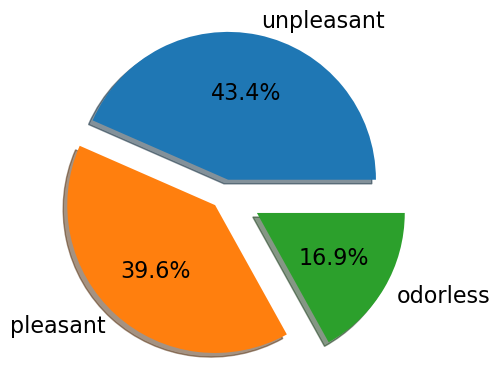

In [202]:
import matplotlib.pyplot as plt

df1['odor'] = df1['odor'].replace(to_replace=["a","l","s"], value="pleasant")
df1['odor'] = df1['odor'].replace(to_replace=["c","y","f","m","p"], value="unpleasant")
df1['odor'] = df1['odor'].replace(to_replace=["n"], value="odorless")
fig, ax = plt.subplots()
autopcts = ax.pie(df1['odor'].value_counts(), labels = df1['odor'].unique(), explode=(0.1, 0.1, 0.25), textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, radius=1)


In [204]:
df = df1
few_values = {}

for col in df:
    few_values[col] = pd.Series(df[col].value_counts().index.values)
        
few_values_df = pd.DataFrame(few_values).fillna('')
few_values_df.T

/tmp/ipykernel_5101/899415738.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  few_values_df = pd.DataFrame(few_values).fillna('')


,0,1,2,3,4,5,6,7,8,9,10,11
classes,0.0,1.0,,,,,,,,,,
cap-shape,x,f,k,b,s,c,,,,,,
cap-surface,y,s,f,g,,,,,,,,
cap-color,2,5,10,12,11,3,8,13,9,6,,
bruises,False,True,,,,,,,,,,
odor,odorless,unpleasant,pleasant,,,,,,,,,
gill-attachment,f,a,,,,,,,,,,
gill-spacing,c,w,,,,,,,,,,
gill-size,b,n,,,,,,,,,,
gill-color,3,8,11,2,5,4,9,1,10,12,7,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

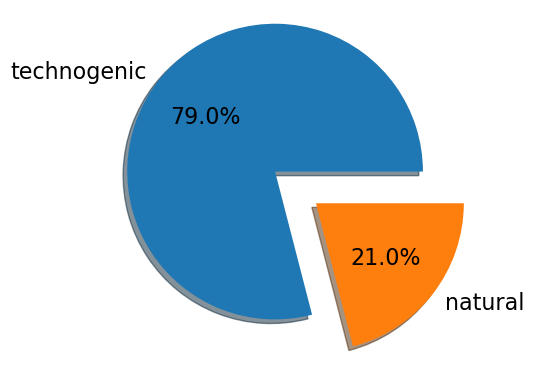

In [206]:
df1['habitat'] = df1['habitat'].replace(to_replace=[1,2,3,7], value="natural")
df1['habitat'] = df1['habitat'].replace(to_replace=[4,5,6], value="technogenic")
fig, ax = plt.subplots()
autopcts = ax.pie(df1['habitat'].value_counts(), labels = df1['habitat'].unique(),explode=(0.25,0.1), textprops={'fontsize': 16}, autopct='%1.1f%%', shadow=True, radius=1)
df.info()

In [208]:
df = df1
few_values = {}

for col in df:
    few_values[col] = pd.Series(df[col].value_counts().index.values)
        
few_values_df = pd.DataFrame(few_values).fillna('')
few_values_df.T

/tmp/ipykernel_5101/899415738.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  few_values_df = pd.DataFrame(few_values).fillna('')


,0,1,2,3,4,5,6,7,8,9,10,11
classes,0.0,1.0,,,,,,,,,,
cap-shape,x,f,k,b,s,c,,,,,,
cap-surface,y,s,f,g,,,,,,,,
cap-color,2,5,10,12,11,3,8,13,9,6,,
bruises,False,True,,,,,,,,,,
odor,odorless,unpleasant,pleasant,,,,,,,,,
gill-attachment,f,a,,,,,,,,,,
gill-spacing,c,w,,,,,,,,,,
gill-size,b,n,,,,,,,,,,
gill-color,3,8,11,2,5,4,9,1,10,12,7,6


### Output from merging multiple attributes:

The habitat and odor attributes were merged according to the appropriate description

## 5. Perform the transformation of any attribute using the Label Encoding method. What is the significant disadvantage of this method?

gill-size – thickness of the plates: b – wide, n – narrow;

In [215]:
print(df.value_counts(['gill-size'], normalize = False, sort = True))
df['gill-size']=df['gill-size'].astype('object')
print("data type- ", df['gill-size'].dtypes)

gill-size
b            5612
n            2512
Name: count, dtype: int64
data type-  object


In [217]:
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,2,True,unpleasant,f,c,n,1,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
1,0,x,s,12,True,pleasant,f,c,b,1,e,c,s,s,11,11,p,11,o,p,2,n,natural
2,0,b,s,11,True,pleasant,f,c,b,2,e,c,s,s,11,11,p,11,o,p,2,n,natural
3,1,x,y,11,True,unpleasant,f,c,n,2,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
4,0,x,s,5,False,odorless,f,w,b,1,t,e,s,s,11,11,p,11,o,e,2,a,natural


In [219]:
df1 = df.copy()

In [221]:
df1.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,2,True,unpleasant,f,c,n,1,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
1,0,x,s,12,True,pleasant,f,c,b,1,e,c,s,s,11,11,p,11,o,p,2,n,natural
2,0,b,s,11,True,pleasant,f,c,b,2,e,c,s,s,11,11,p,11,o,p,2,n,natural
3,1,x,y,11,True,unpleasant,f,c,n,2,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
4,0,x,s,5,False,odorless,f,w,b,1,t,e,s,s,11,11,p,11,o,e,2,a,natural


In [223]:
df1['gill-size'] = df1['gill-size'].map({'b':1 ,'n':0})
df1.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,2,True,unpleasant,f,c,0,1,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
1,0,x,s,12,True,pleasant,f,c,1,1,e,c,s,s,11,11,p,11,o,p,2,n,natural
2,0,b,s,11,True,pleasant,f,c,1,2,e,c,s,s,11,11,p,11,o,p,2,n,natural
3,1,x,y,11,True,unpleasant,f,c,0,2,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
4,0,x,s,5,False,odorless,f,w,1,1,t,e,s,s,11,11,p,11,o,e,2,a,natural


In [225]:
df = df1.copy()

In [227]:
print(df.value_counts(['gill-size'], normalize = False, sort = True))
df['gill-size']=df['gill-size'].astype('object')
print("data type ", df['gill-size'].dtypes)

gill-size
1            5612
0            2512
Name: count, dtype: int64
data type  object


### Conclusion on attribute conversion using the Label Encoding method.

A significant disadvantage is that attribute values ​​not specified in the list are replaced with NaN and you need to be careful not to apply the replacement twice

## 6. Perform the transformation of all attributes using the One-Hot Encoding method. Output the resulting output. What is the disadvantage of this method?

In [231]:
df1 = df.copy()

In [233]:
df1.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,2,True,unpleasant,f,c,0,1,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
1,0,x,s,12,True,pleasant,f,c,1,1,e,c,s,s,11,11,p,11,o,p,2,n,natural
2,0,b,s,11,True,pleasant,f,c,1,2,e,c,s,s,11,11,p,11,o,p,2,n,natural
3,1,x,y,11,True,unpleasant,f,c,0,2,e,e,s,s,11,11,p,11,o,p,1,s,technogenic
4,0,x,s,5,False,odorless,f,w,1,1,t,e,s,s,11,11,p,11,o,e,2,a,natural


In [235]:
pd.get_dummies(df1)

,classes,bruises,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_2,cap-color_3,cap-color_5,cap-color_6,cap-color_8,cap-color_9,cap-color_10,cap-color_11,cap-color_12,cap-color_13,odor_odorless,odor_pleasant,odor_unpleasant,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_0,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,gill-color_12,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,...,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_2,stalk-color-above-ring_3,stalk-color-above-ring_5,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-above-ring_10,stalk-color-above-ring_11,stalk-color-above-ring_12,stalk-color-above-ring_13,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_5,stalk-color-below-ring_7,stalk-color-below-ring_8,stalk-color-below-ring_10,stalk-color-below-ring_11,stalk-color-below-ring_12,stalk-color-below-ring_13,veil-type_p,veil-color_2,veil-color_7,veil-color_11,veil-color_12,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_6,spore-print-color_7,spore-print-color_9,spore-print-color_11,spore-print-color_12,population_a,population_c,population_n,population_s,population_v,population_y,habitat_natural,habitat_technogenic
0,1,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,0,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,0,False,False,False,False

### Conclusion on attribute transformation using One-Hot Encoding method

As a result of applying the get_dummies method to the entire dataset, all categorical features will be unpacked into separate attributes with the True/False value. With a large number of unique attribute values, the number of attributes will increase several times.

## 7. Draw a conclusion about the cases in which Label Encoding can be used, and in which One-Hot Encoding

### Conclusion on the use of the Label Encoding and One-Hot Encoding methods:

If the attribute can be converted into discrete values ​​or grouped, the Label Encoding method can be used. If the attribute needs to have separate values ​​in a separate attribute, the One-Hot Encoding method can be used.

## 8. Draw conclusions and generate a report indicating the commands implemented and screenshots of the results.

### Conclusion on the lab work

Categorical data processing was carried out using the agaricus-lepiota dataset as an example